# 1. Predicting temperature
In this exercise, you'll work with historical temperature data from the Szeged, Hungary area. The dataset you'll use is a Postgres database version of this dataset from Kaggle. To complete this assignment, submit a Jupyter notebook containing your solutions to the following tasks:

- First, load the dataset from the weatherinszeged table from Thinkful's database.
- Build a regression model where the target variable is temperature. As explanatory variables, use humidity, windspeed, windbearing, and pressure. Estimate the model using OLS.
- Now, check if your model meets the Gauss-Markov Conditions above. If some of the assumptions are not met, discuss the implications of the violations for the correctness of your model.



In [47]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
from sklearn import linear_model 
import warnings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

warnings.filterwarnings('ignore')


In [41]:

#data base credentials 
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

#create engine to access database
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
))

#creat dataframe from data 
weather_df = pd.read_sql_query('select * from weatherinszeged', con=engine)

#dispose of engine
engine.dispose() 
#As in earlier assignments, be sure to close the database connection 
# after initially pulling in your data.



In [42]:
weather_df.head()
weather_df.columns

Index(['date', 'summary', 'preciptype', 'temperature', 'apparenttemperature', 'humidity', 'windspeed', 'windbearing', 'visibility', 'loudcover', 'pressure', 'dailysummary'], dtype='object')

In [43]:
#potential features
weather_df
target_var = 'temperature'
expl_var= ['humidity', 'windspeed', 'windbearing','pressure']

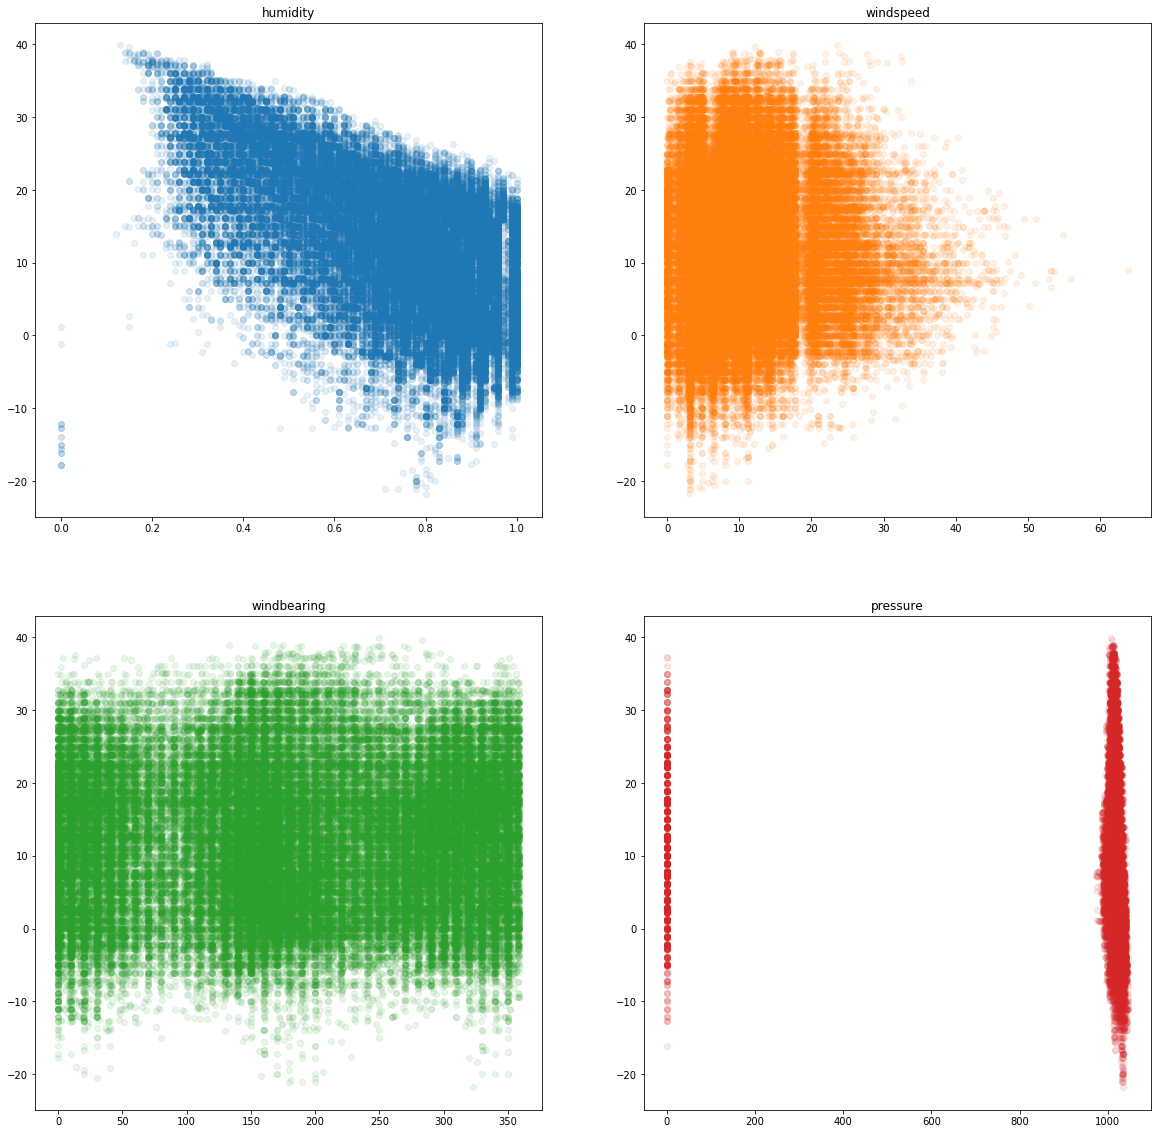

In [44]:

#expl_var= ['humidity', 'windspeed', 'windbearing','pressure']
plt.figure(figsize=(20,20))
plt.tight_layout
colorlist = ['tab:blue','tab:orange','tab:green','tab:red',
             'tab:purple','tab:brown','tab:pink',
             'tab:grey','tab:olive','tab:cyan']

p=0

for i, variable in enumerate( expl_var,1):

    c = colorlist[p]
    if p > len(colorlist):
        p=0
    else:
        p+=1
        
    
    plt.subplot(math.ceil(len(expl_var)/2),2,i)
    plt.scatter(weather_df[variable],weather_df['temperature'], color = c, alpha=0.1)
    plt.title(variable )

In [53]:
# Y is the target variable
Y = weather_df['temperature']
# X is the feature set which includes
# is_male and is_smoker variables
X = weather_df[['humidity', 'windspeed', 'windbearing','pressure']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.9264381852854


In [54]:
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            temperature   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                 1.750e+04
Date:                Fri, 24 Jan 2020   Prob (F-statistic):               0.00
Time:                        14:47:42   Log-Likelihood:            -3.2821e+05
No. Observations:               96453   AIC:                         6.564e+05
Df Residuals:                   96448   BIC:                         6.565e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          37.9264      0.233    162.709      0.000      37.470      38.383
humidity      -32.4962      0.123   -264.288      0.000     -32.737     -32.255
windspeed      -0.2014      0.003    -57.557      0.000      -0.208      -0.195
windbearing     0.0040      0.000     18.463      0.000       0.004       0.004
pressure       -0.0007      0.000     -3.452      0.001      -0.001      -0.000
==============================================================================
Omnibus:                     3375.432   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3793.297
Skew:                          -0.455   Prob(JB):                         0.00
Kurtosis:                       3.339   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
# Y is the target variable
Y = weather_df['temperature']
# X is the feature set which includes
# is_male and is_smoker variables
X = weather_df[['humidity', 'windspeed', 'windbearing','pressure']]

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [-3.24962454e+01 -2.01413742e-01  4.04836936e-03 -6.91759209e-04]

Intercept: 
 37.9264381852854


### Check the Error Term AKA mean of ERRORS 

In [58]:
predictions = lrm.predict(X)
errors = Y - predictions

print("Mean of the errors in the weather temperature model is: {}".format(np.mean(errors)))
    
    
    

Mean of the errors in the weather temperature model is: -6.377484417162298e-15


### Check the Homoscedasticity 

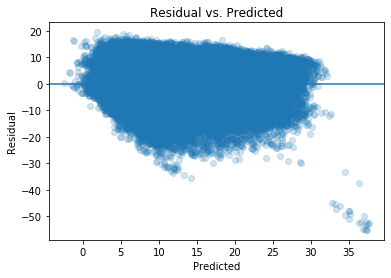

In [69]:
plt.scatter(predictions, errors, alpha = 0.2)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [60]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 2464.84 and p value is 0
Levene test statistic value is 2321.24 and p value is 0


In [ ]:
errors appear to be clusteringin in the middle and there are a few outliers 

### Testing for correliniarity 

In [62]:
weather_df[['humidity', 'windspeed', 'windbearing','pressure','temperature']].corr()

,humidity,windspeed,windbearing,pressure,temperature
humidity,1.000000,-0.224951,0.000735,0.005454,-0.632255
windspeed,-0.224951,1.000000,0.103822,-0.049263,0.008957
windbearing,0.000735,0.103822,1.000000,-0.011651,0.029988
pressure,0.005454,-0.049263,-0.011651,1.000000,-0.005447
temperature,-0.632255,0.008957,0.029988,-0.005447,1.000000


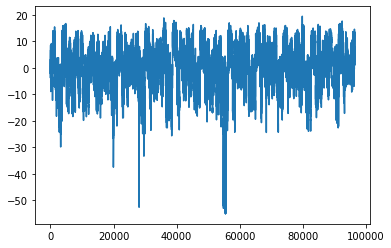

In [63]:
plt.plot(errors)
plt.show()

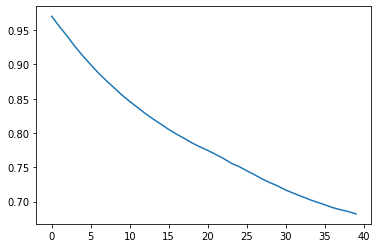

In [64]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

In [70]:
the auto correlation apears to be much higher with the lower values

SyntaxError: invalid syntax (<ipython-input-70-b1db7a843452>, line 1)

### test for normal distribution of errors 

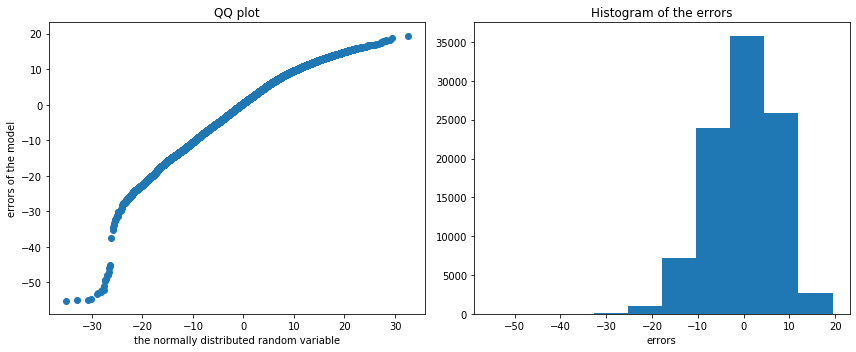

In [71]:

rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [72]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [73]:
jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 3793.296735252366 and p value is 0.0
Normality test statistics is 3375.432307699586 and p value is 0.0


## problems with liniar models 

the error term is not zero

the wind and pressure variables are more highly correlated with one another than temeperature 

the errors are showing correlation 

the errors appear to be normally distributed 